# **<font color=yellow > *Predicting Water Quality using Machine Learning algorithms:-* </font>**

## Importing the Needed libraries

In [ ]:
# for data analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Imported all the libraries...")

Imported all the libraries...


## Import the Data .csv File and Read the File

In [ ]:
# load the 1st raw data
df = pd.read_csv("/water_potability.csv")

# reading the data
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
#reading the first 5 rows
print ("the default first 5 rows: -\n")
df.head()

the default first 5 rows: -



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#reading the last 5 rows
print ("the default last 5 rows: -\n")
df.tail()

the default last 5 rows: -



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


## Data Pre-processing

### **Exploratory Data Analysis**

#### Type of the dataframe

In [ ]:
type(df)

pandas.core.frame.DataFrame

#### Shape of the Dataframe

In [ ]:
# print the shape
dataframe_row_count, dataframe_column_count = df.shape
print('Row Count:', dataframe_row_count)
print('Column Count:', dataframe_column_count)

Row Count: 3276
Column Count: 10


In [ ]:
# print the dimension
df.ndim

2

#### Concise Summary of Dataframe

In [ ]:
#print a concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#all the columns present in the dataframe
columns = list(df.columns)
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
df.duplicated().sum()

0

In [ ]:
#count of unique values
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

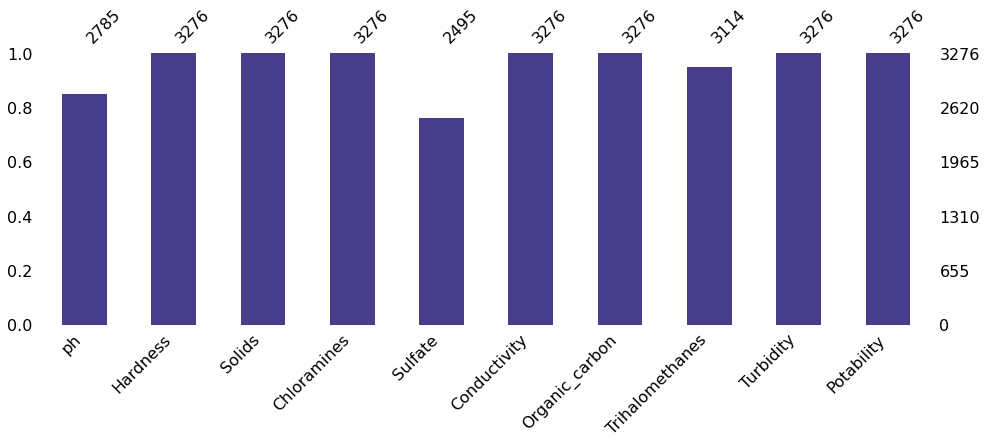

In [ ]:
import missingno as msno

msno.bar(df, figsize = (16,5),color = "#483D8B")
plt.show()

In [ ]:
# Potability column
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

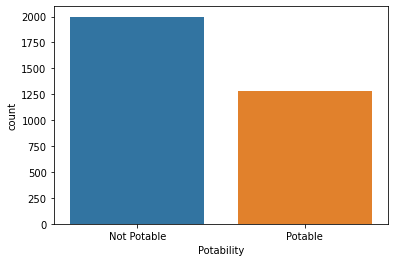

In [ ]:
#Plotting the Potability column
g = sns.countplot(df['Potability'])
g.set_xticklabels(['Not Potable','Potable'])
plt.show()

#### Checking the features

###### Numerical features

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']

print('Number of numerical variables: ',len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  10


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
for feature in numerical_features:
    print('* The feature is "{}" and number of numeric values is {}'.format(feature,len(df[feature].unique())))

* The feature is "ph" and number of numeric values is 2786
* The feature is "Hardness" and number of numeric values is 3276
* The feature is "Solids" and number of numeric values is 3276
* The feature is "Chloramines" and number of numeric values is 3276
* The feature is "Sulfate" and number of numeric values is 2496
* The feature is "Conductivity" and number of numeric values is 3276
* The feature is "Organic_carbon" and number of numeric values is 3276
* The feature is "Trihalomethanes" and number of numeric values is 3115
* The feature is "Turbidity" and number of numeric values is 3276
* The feature is "Potability" and number of numeric values is 2


In [ ]:
for feature in numerical_features:
    print('* The feature is "{}" and the values are {}'.format(feature,df[feature].unique()))

* The feature is "ph" and the values are [       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
* The feature is "Hardness" and the values are [204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
* The feature is "Solids" and the values are [20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
* The feature is "Chloramines" and the values are [7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586]
* The feature is "Sulfate" and the values are [368.51644135          nan 356.88613564 ... 258.93060041 345.70025734
 359.94857437]
* The feature is "Conductivity" and the values are [564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046]
* The feature is "Organic_carbon" and the values are [10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763]
* The feature is "Trihalomethanes" and the values are [86.99097046 56.32907628 66.42009251 .

##### Checking for outliers

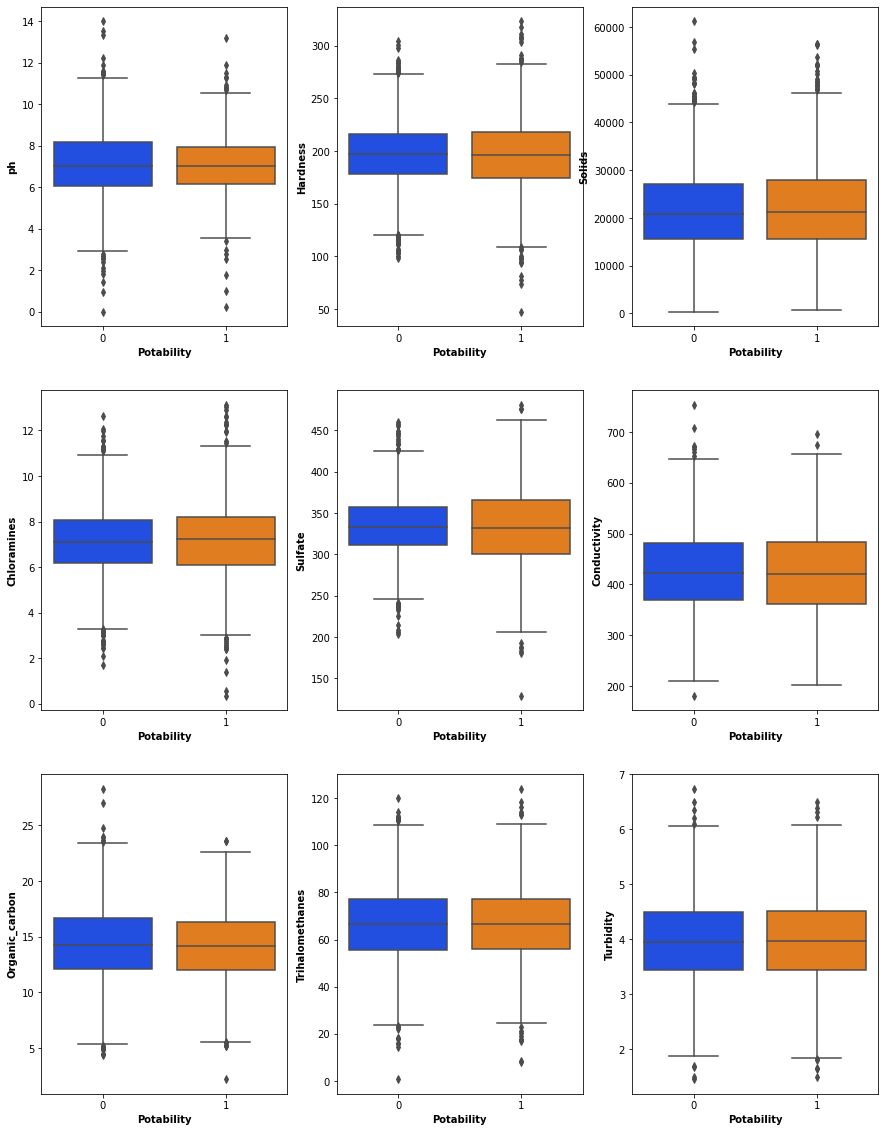

In [ ]:
df_num = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axs = plt.subplots(3, 3, figsize=(15,20))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="Potability", y=col_name, data=df, ax=axs[i],  palette = 'bright')
    axs[i].set_xlabel("Potability", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [ ]:
discrete_features= [feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete variables count: {}".format(len(discrete_features)))

df[discrete_features].head()

Discrete variables count: 1


,Potability
0,0
1,0
2,0
3,0
4,0


In [ ]:
continuous_features= [feature for feature in numerical_features if feature not in discrete_features ]
print("Continuous variables count: {}".format(len(continuous_features)))

df[continuous_features].head()

Continuous variables count: 9


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


###### Categorical features

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features: ',len(categorical_features))

df[categorical_features].head()

Number of categorical features:  0


""
0
1
2
3
4


#### Missing Values

In [ ]:
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [ ]:
# Checking for null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

ph 	 15.0% null values
Hardness 	 0.0% null values
Solids 	 0.0% null values
Chloramines 	 0.0% null values
Sulfate 	 23.8% null values
Conductivity 	 0.0% null values
Organic_carbon 	 0.0% null values
Trihalomethanes 	 4.9% null values
Turbidity 	 0.0% null values
Potability 	 0.0% null values


In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean().round(4))

df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean().round(4))

df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean().round(4))

In [ ]:
# Checking for null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Statistical Summary of Columns

In [ ]:
# statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080800,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775782,36.142612,129.000000,317.094638,333.775800,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.396293,15.769881,0.738000,56.647656,66.396300,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.median()

ph                     7.080800
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              333.775800
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.396300
Turbidity              3.955028
Potability             0.000000
dtype: float64

In [ ]:
df.quantile(0.75) - df.quantile(0.25)

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


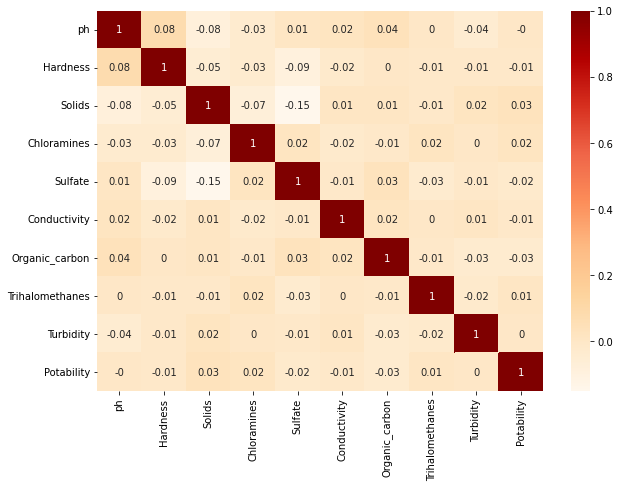

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

#### Visualize the Dataset

##### Pairplot

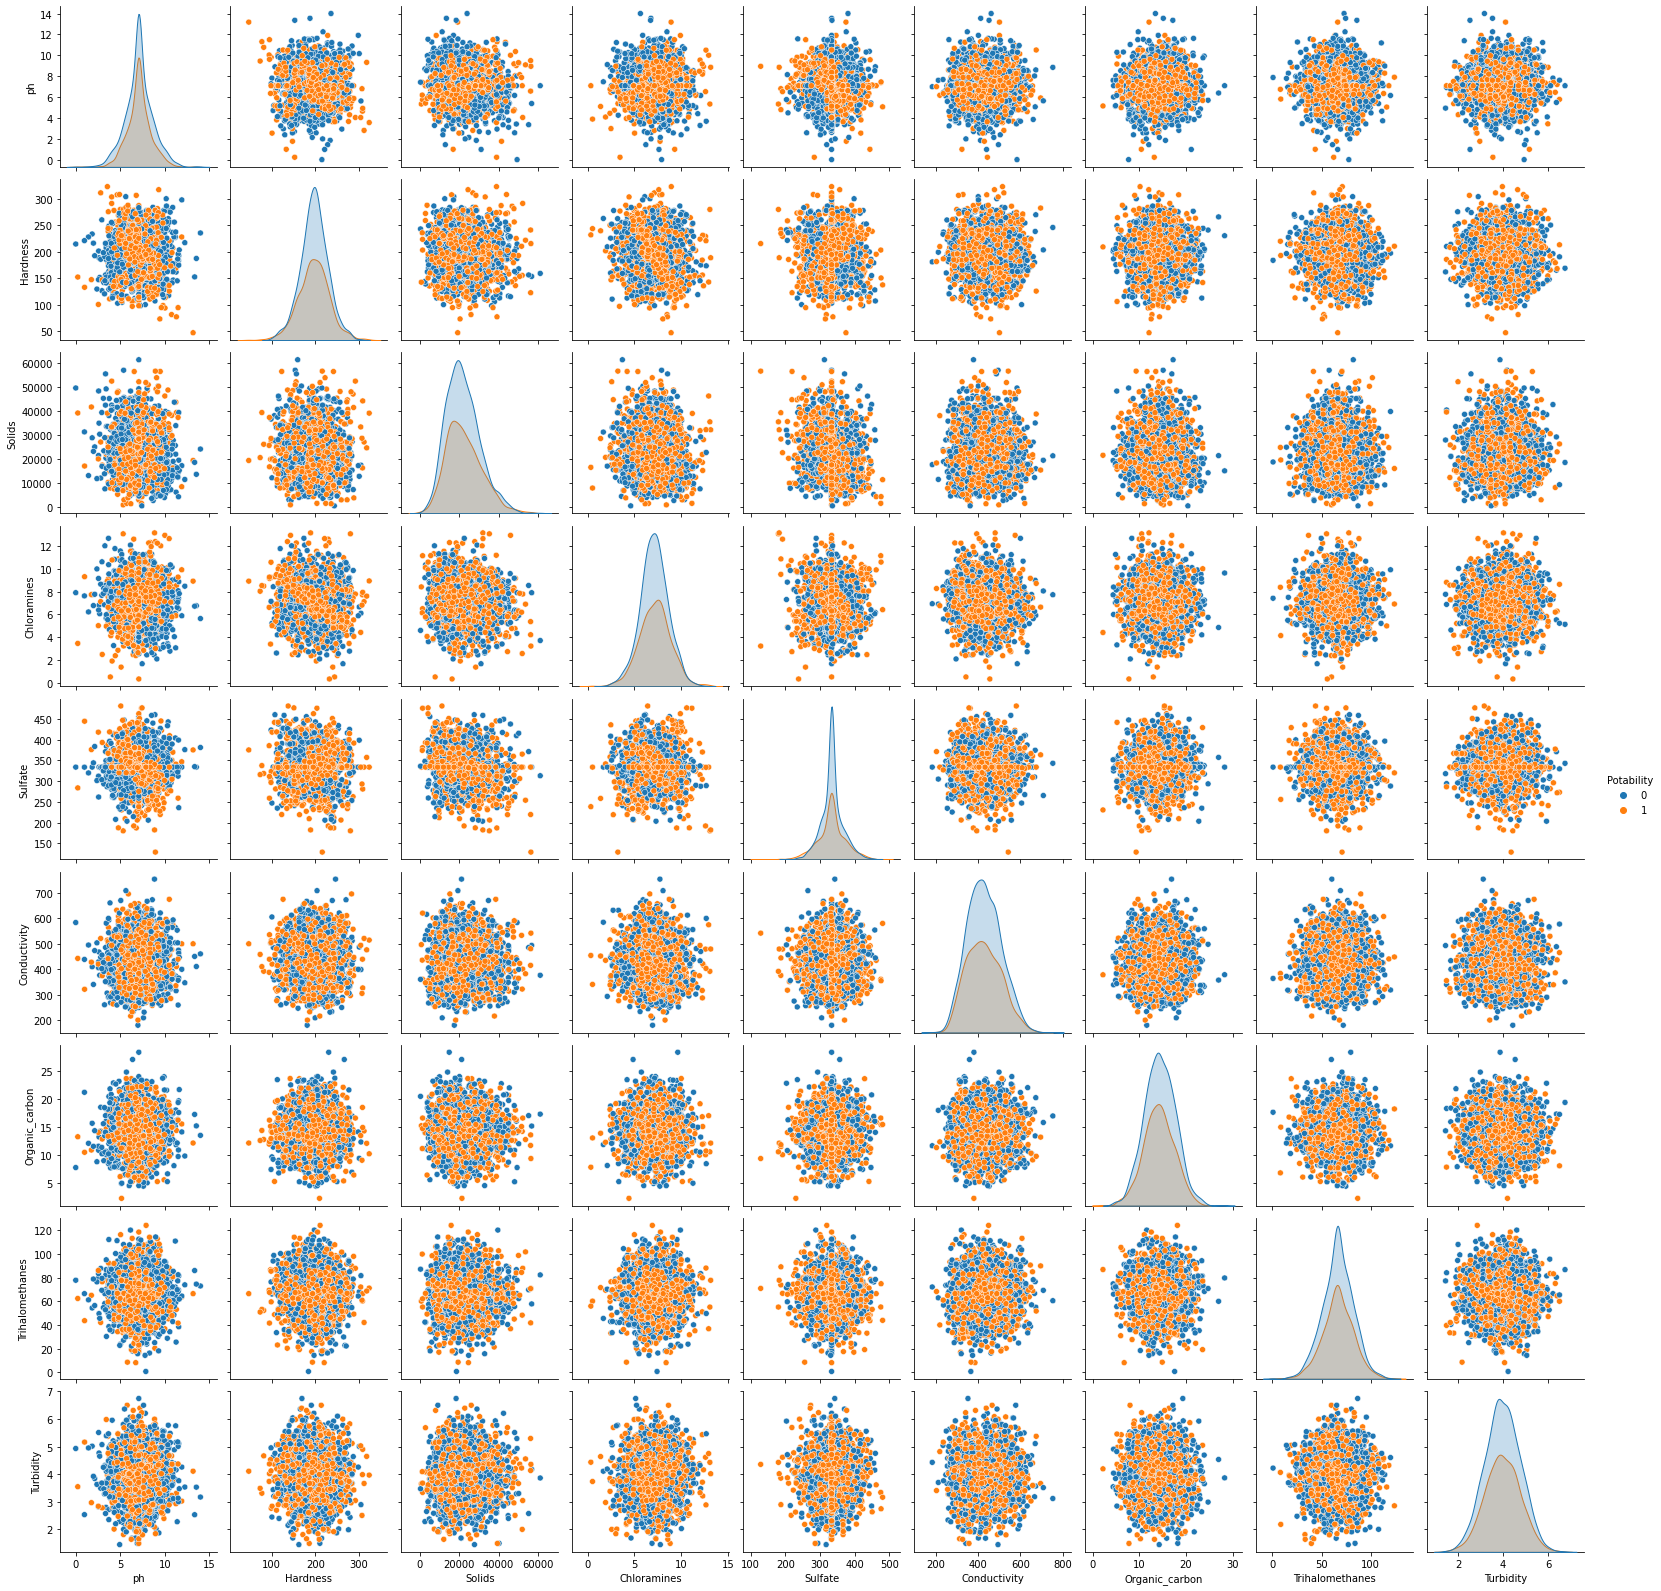

In [ ]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df, hue ='Potability')

##### Pie Chart

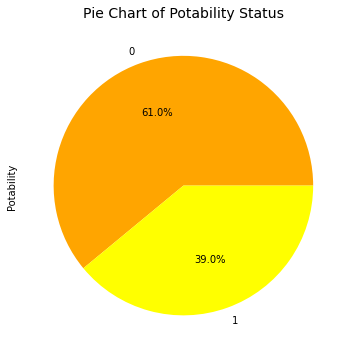

In [ ]:
plt.figure(figsize=(5,7))
df['Potability'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['orange','yellow'])
plt.title("Pie Chart of Potability Status", fontdict={'fontsize': 14})
plt.tight_layout()

##### Distribution plot

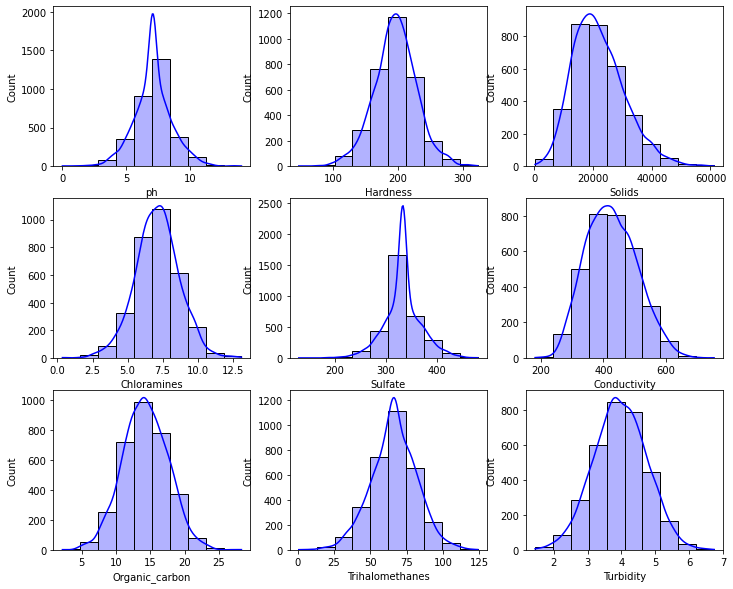

In [ ]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],kde=True,alpha=0.3, bins=10, color='blue',common_norm=False)

In [ ]:
df.skew().sort_values(ascending = False)

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.027794
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041185
Trihalomethanes   -0.085161
dtype: float64

In [ ]:
# Checking for null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

*Most features are normal distribution. Values between 0.5 to -0.5 will be considered as the normal distribution. Though Solids has value slightly above 0.5, we still consider it doesn't have skewness.*

#### Finding top features

In [ ]:
#Using the SelectKBest library to run a chi-squared statistical test & select the top 3 features that are most related to the output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X= df.iloc[:,0:9] #all features 
Y= df.iloc[:,-1] #target (Potability)

best_features= SelectKBest(score_func=chi2, k=3) #function that select the top 3 features.
fit= best_features.fit(X,Y) 

#Creating dataframes for the features and the score of each feature.
Potability_scores= pd.DataFrame(fit.scores_)
Potability_columns= pd.DataFrame(X.columns)

In [ ]:
#Create a dataframe that combines all the features and their corresponding scores.
features_scores= pd.concat([Potability_columns, Potability_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
8,Turbidity,0.001256
0,ph,0.010797
7,Trihalomethanes,0.594250
3,Chloramines,0.651609
6,Organic_carbon,2.258331
5,Conductivity,3.316466
1,Hardness,3.451841
4,Sulfate,5.449222
2,Solids,13023.976277


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Final Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['Hardness','Sulfate','Solids']
stand_scaled = s.fit_transform(df[['Hardness','Sulfate','Solids']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df=df.drop(columns=columns,axis=1)
stand_scaled.head()

,Hardness,Sulfate,Solids
0,0.259195,9.613573e-01,-0.139471
1,-2.036414,4.929337e-07,-0.385987
2,0.847665,4.929337e-07,-0.240047
3,0.547651,6.395188e-01,0.000493
4,-0.464429,-6.541767e-01,-0.460249


In [ ]:
df = pd.concat([df, stand_scaled], axis=1)
df.head()

,ph,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness,Sulfate,Solids
0,7.080800,7.300212,564.308654,10.379783,86.990970,2.963135,0,0.259195,9.613573e-01,-0.139471
1,3.716080,6.635246,592.885359,15.180013,56.329076,4.500656,0,-2.036414,4.929337e-07,-0.385987
2,8.099124,9.275884,418.606213,16.868637,66.420093,3.055934,0,0.847665,4.929337e-07,-0.240047
3,8.316766,8.059332,363.266516,18.436524,100.341674,4.628771,0,0.547651,6.395188e-01,0.000493
4,9.092223,6.546600,398.410813,11.558279,31.997993,4.075075,0,-0.464429,-6.541767e-01,-0.460249


In [ ]:
df.isnull().sum()

ph                 0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
Hardness           0
Sulfate            0
Solids             0
dtype: int64

## **Model Building**

In [ ]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Splitting the Raw Data into Different Sections

In [ ]:
x=df.drop('Potability',axis=1)
x

,ph,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Hardness,Sulfate,Solids
0,7.080800,7.300212,564.308654,10.379783,86.990970,2.963135,0.259195,9.613573e-01,-0.139471
1,3.716080,6.635246,592.885359,15.180013,56.329076,4.500656,-2.036414,4.929337e-07,-0.385987
2,8.099124,9.275884,418.606213,16.868637,66.420093,3.055934,0.847665,4.929337e-07,-0.240047
3,8.316766,8.059332,363.266516,18.436524,100.341674,4.628771,0.547651,6.395188e-01,0.000493
4,9.092223,6.546600,398.410813,11.558279,31.997993,4.075075,-0.464429,-6.541767e-01,-0.460249
...,...,...,...,...,...,...,...,...,...
3271,4.668102,7.166639,526.424171,13.894419,66.687695,4.435821,-0.081758,7.242639e-01,2.916188
3272,7.808856,8.061362,392.449580,19.903225,66.396300,2.798243,-0.085667,4.929337e-07,-0.534295
3273,9.419510,7.350233,432.044783,11.039070,69.845400,3.298875,-0.626829,4.929337e-07,1.270810
3274,5.126763,6.303357,402.883113,11.168946,77.488213,4.708658,1.041355,4.929337e-07,-1.144058


In [ ]:
y=df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3,
                                                    random_state=2014, stratify=y, shuffle=True)

### Shape of the train and test data

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2293, 9)
(983, 9)


### Checking the distribution

In [ ]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.609682
1    0.390318
Name: Potability, dtype: float64

In [ ]:
# distribution in test set
y_test.value_counts(normalize=True)

0    0.610376
1    0.389624
Name: Potability, dtype: float64

### Train the ML models

In [ ]:
models = dict()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier(n_estimators = 250, random_state = 2014)
models['Naive Bayes'] = BernoulliNB()
models['xgboost'] = XGBClassifier(max_depth= 8, n_estimators= 250, random_state= 2014,  learning_rate= 0.08, n_jobs=5)
models['AdaBoost'] = AdaBoostClassifier(learning_rate = 0.08, n_estimators = 250, random_state = 2014) 

In [ ]:
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Logreg model fitting completed.
Random Forest model fitting completed.
Naive Bayes model fitting completed.
xgboost model fitting completed.
AdaBoost model fitting completed.


### Evaluating the ML models

In [ ]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print("Confusion matrix: -\n",confusion_matrix(**arg_test))
    print("\nClassification report: -\n",classification_report(**arg_test))

Test Set Prediction:

--------------------Logreg--------------------
Confusion matrix: -
 [[597   3]
 [375   8]]

Classification report: -
               precision    recall  f1-score   support

           0       0.61      0.99      0.76       600
           1       0.73      0.02      0.04       383

    accuracy                           0.62       983
   macro avg       0.67      0.51      0.40       983
weighted avg       0.66      0.62      0.48       983

--------------------Random Forest--------------------
Confusion matrix: -
 [[529  71]
 [242 141]]

Classification report: -
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       600
           1       0.67      0.37      0.47       383

    accuracy                           0.68       983
   macro avg       0.68      0.62      0.62       983
weighted avg       0.68      0.68      0.66       983

--------------------Naive Bayes--------------------
Confusion matrix: -
 [[600   

In [ ]:
print('Summary of Accuracy Score: -\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score: -

Logreg Model:  0.6155
Random Forest Model:  0.6816
Naive Bayes Model:  0.6104
xgboost Model:  0.6501
AdaBoost Model:  0.6246


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier( criterion='gini',n_estimators = 300, random_state = 2014)

In [ ]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=2014)

In [ ]:
classifier.score(x_train, y_train)

1.0

In [ ]:
classifier.score(x_test, y_test)

0.681586978636826

In [ ]:
classifier.predict(x_test)
 
df.columns
 
pred = classifier.predict(x_test)

pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
if pred[0] == 0:
  print('The water is not potable')
else:
  print('The water is potable')

The water is not potable


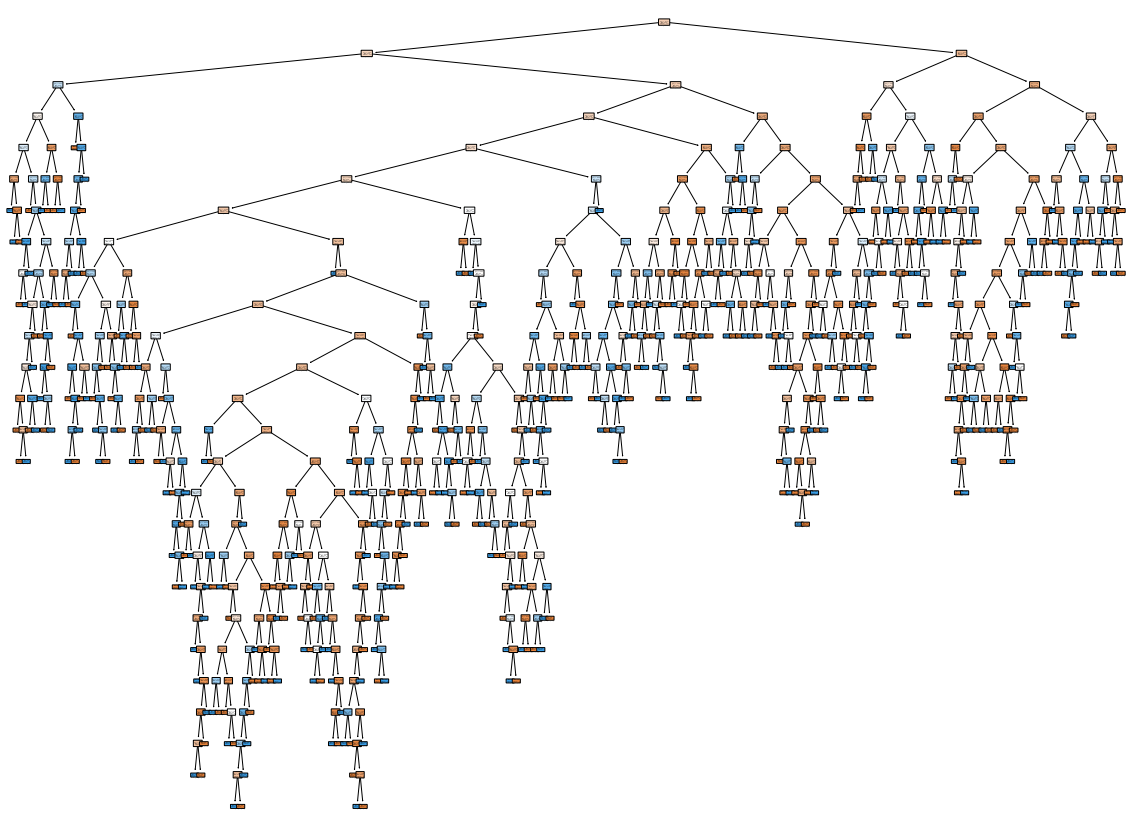

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,15))
for i in range (len(classifier.estimators_)):
    tree.plot_tree(classifier.estimators_[i],filled=True,rounded=True)

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()

In [ ]:
score=cross_val_score(RandomForestClassifier(n_estimators=300),x_train,y_train,cv=10)

In [ ]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.67391304 0.66086957 0.65652174 0.67248908 0.65502183 0.68122271
 0.68558952 0.65938865 0.65502183 0.64628821]
Average Cross Validation score :0.6646326181887223


In [ ]:
score = cross_val_score(RandomForestClassifier(n_estimators=300),x_test,y_test,cv=10)

In [ ]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.66666667 0.66666667 0.68686869 0.62244898 0.64285714 0.59183673
 0.69387755 0.64285714 0.62244898 0.64285714]
Average Cross Validation score :0.6479385693671408
